In [ ]:
#step 1: import libraries
import pandas as pd #data manipulation
import numpy as np #support for arrays and matrices
import matplotlib.pyplot as plt #visualization in python
import seaborn # data visualization statistical graphics

In [ ]:
#keras is an open-source software library that provides a python interface for artificial neural networks. 
from keras.datasets import cifar10

In [31]:
#these will be the variables. X_train will contain input, y_train the labels, the tests are used to evaluate the model
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [32]:
X_train.shape

(50000, 32, 32, 3)

In [33]:
X_test.shape

(10000, 32, 32, 3)

In [34]:
y_train.shape

(50000, 1)

In [35]:
y_test.shape

(10000, 1)

In [10]:
#step2: visualize the data

[0]


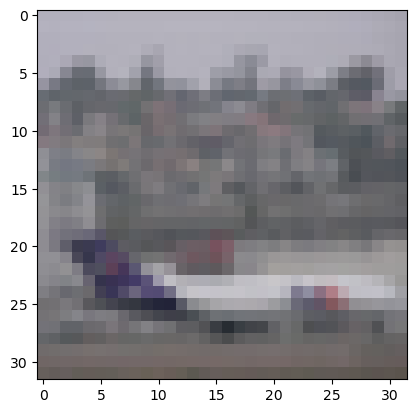

In [36]:
i = 30000
plt.imshow(X_train[i])
print(y_train[i])
#CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
# 0 Airplanes
# 1 Cars
# 2 Birds
# 3 Cats
# 4 Deer
# 5 Dogs
# 6 Frogs
# 7 Horses
# 8 Ships
# 9 Trucks

In [22]:
#print a matrix of 15 images

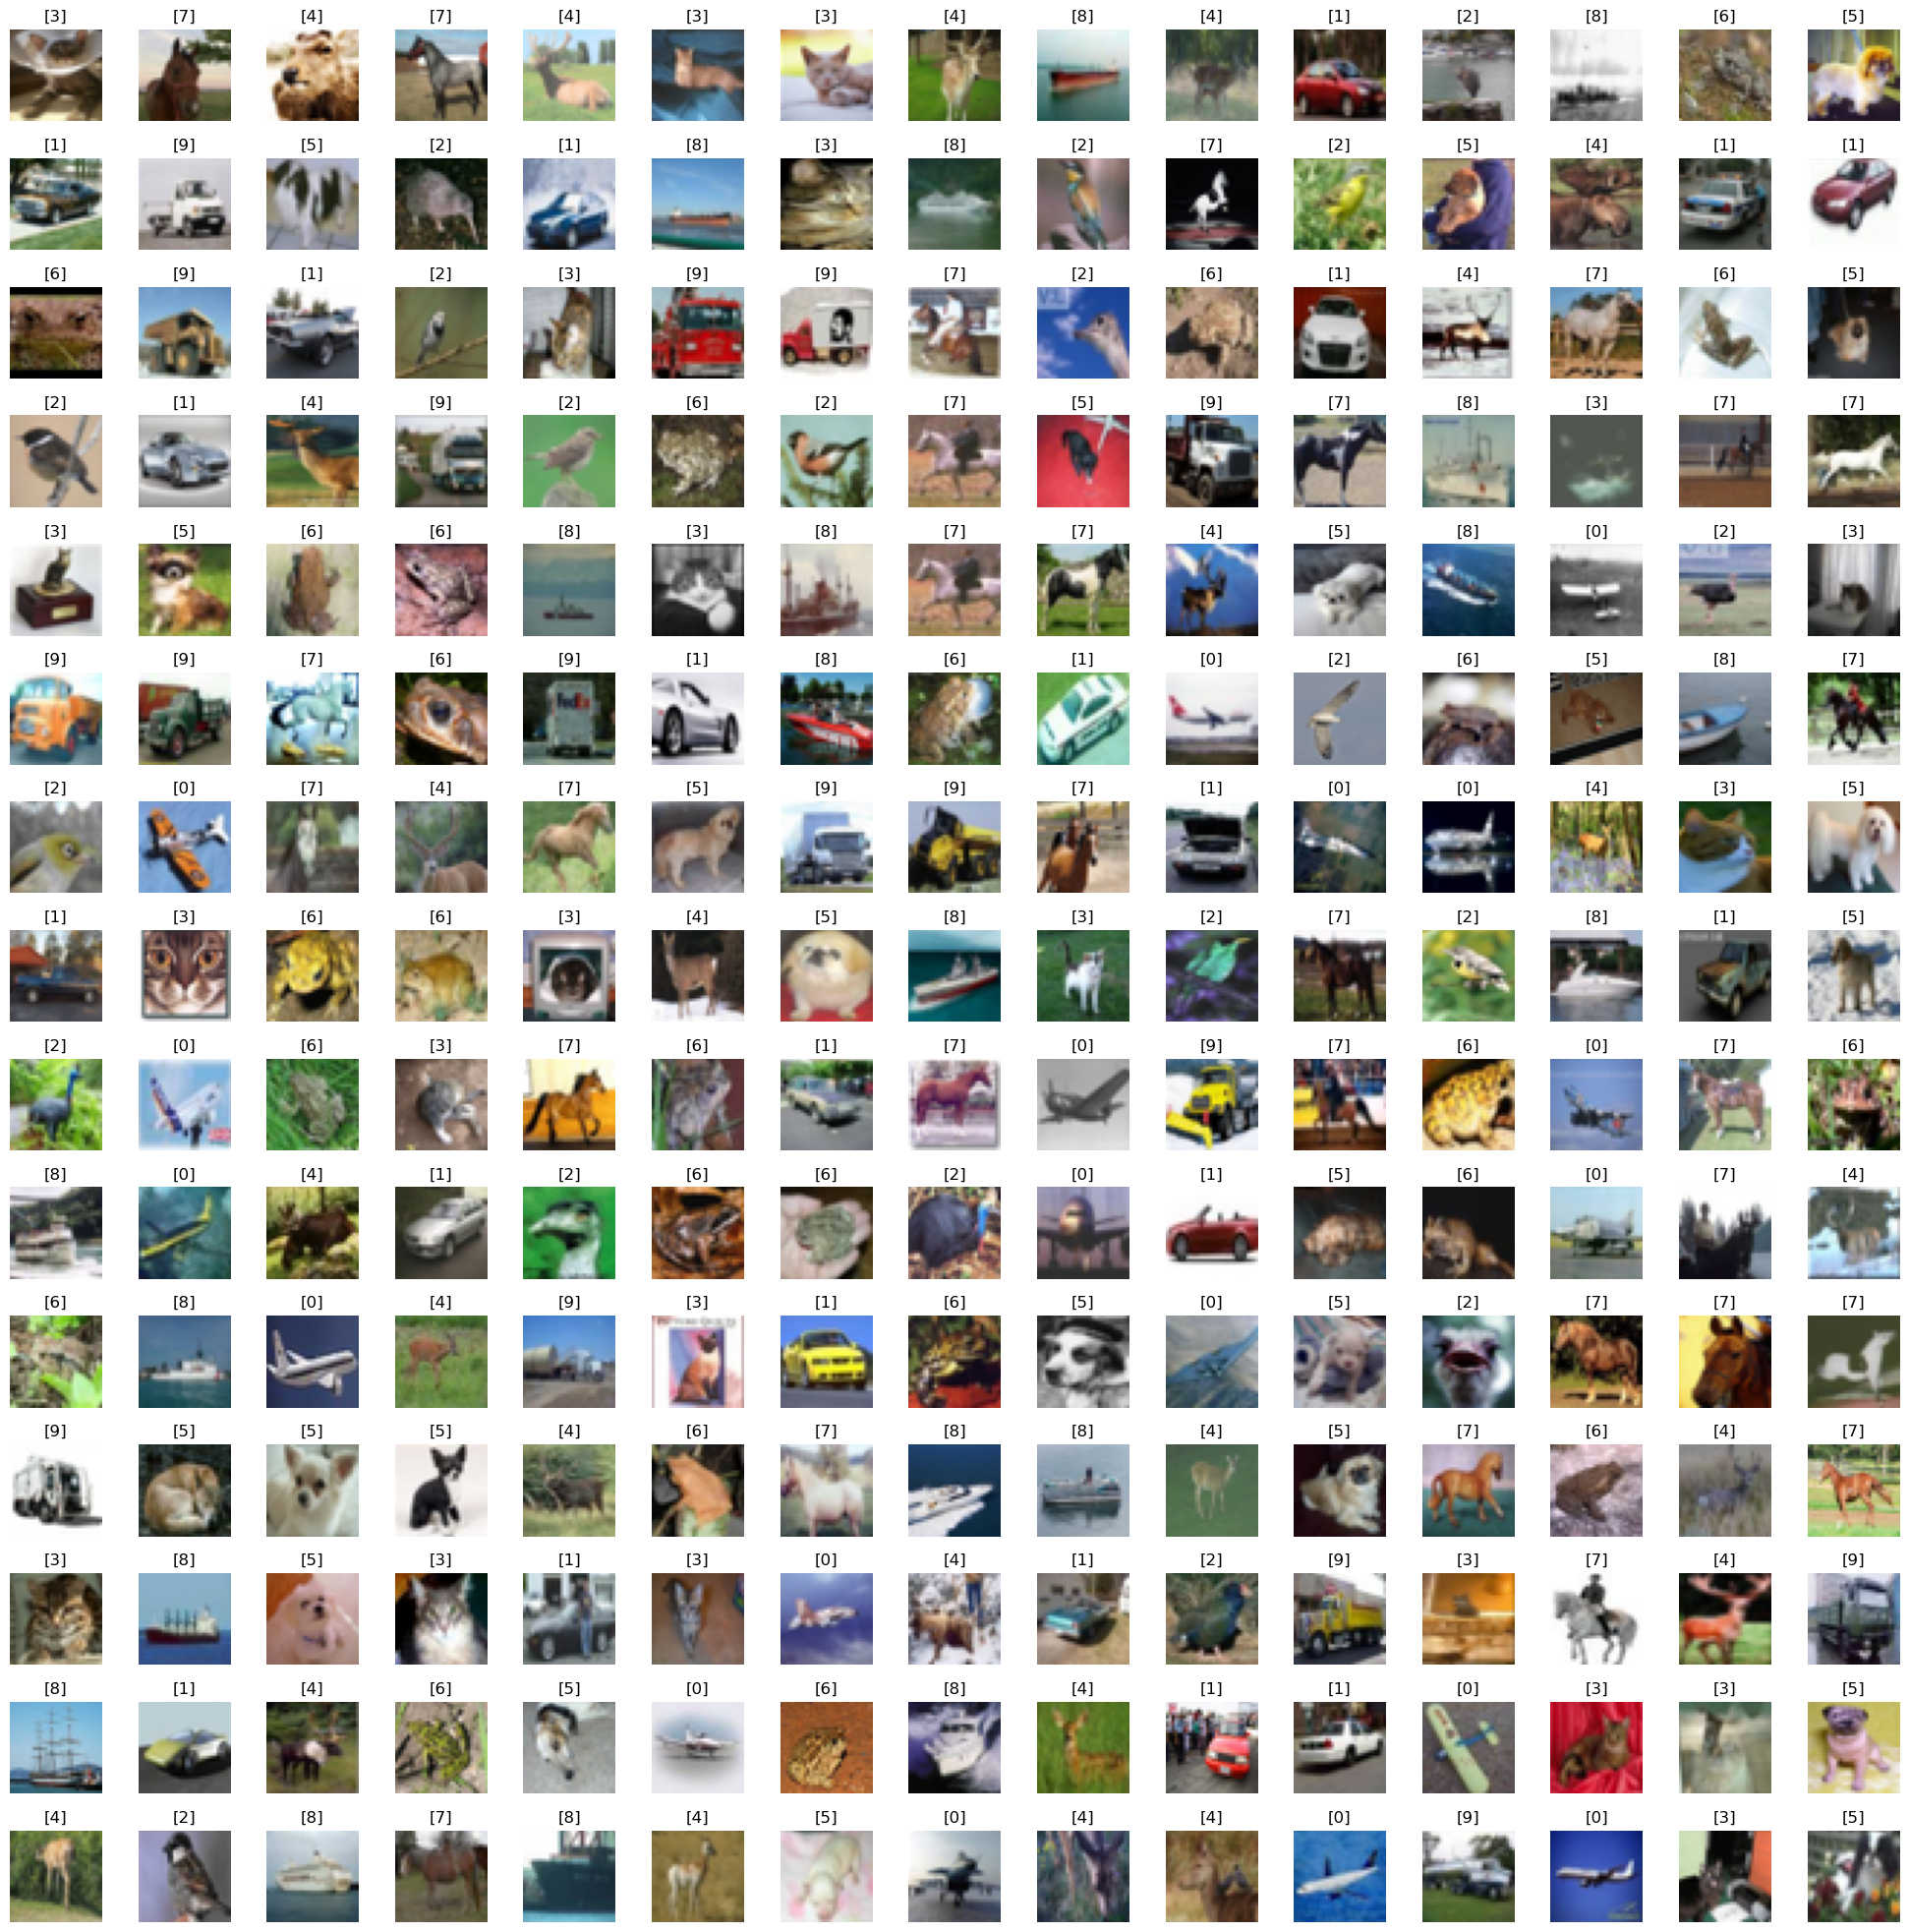

In [43]:
W_grid = 15 #width
L_grid = 15 #lenght

fig, axes = plt.subplots(L_grid, W_grid,figsize = (25,25)) #the size is 25 x 25 
axes = axes.ravel() #flattens the 2D array into a 1D array

n_training=len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0,n_training) #pick a random number
    axes[i].imshow(X_train[index])
    
    n_training
    # now i want to label the pictures
    axes[i].set_title(y_train[index])
    # now i want to remove the numbers on the sides of the pictures
    axes[i].axis('off')
   
    #fix the space between the figures
    plt.subplots_adjust(hspace=0.4)
    
    

In [53]:
# step3: data preparation convert the images to a flot type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [49]:
number_cat = 10

In [50]:
# i know i have 10 categories
y_train


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [51]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [52]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [56]:
y_test

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [58]:
X_train = X_train/255
X_test = X_test/255

In [59]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [60]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [61]:
X_train.shape

(50000, 32, 32, 3)

In [62]:
Input_shape = X_train.shape[1:]

In [63]:
Input_shape

(32, 32, 3)

In [ ]:
#step4: train the model